In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
RANDOM_STATE = 101

### Load Data

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

#### Balancing dataset

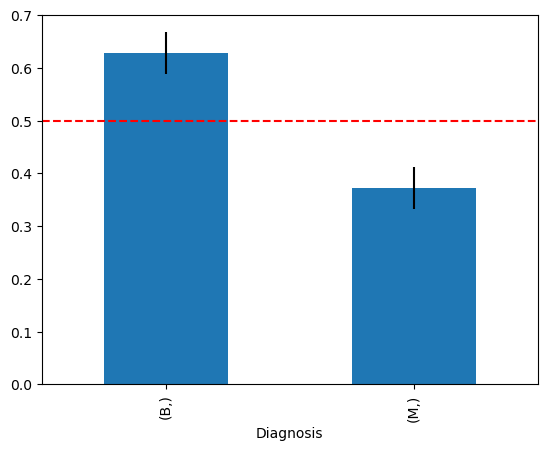

In [4]:
freqs =y.value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

freqs.plot(kind='bar',yerr=std_errors*1.96)

plt.axhline(expected_frequency,color='red',linestyle='--')

### Model

#### Default

In [5]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify = y)

In [6]:
svc = SVC(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [7]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
rbf_train_sizes, rbf_train_scores, rbf_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

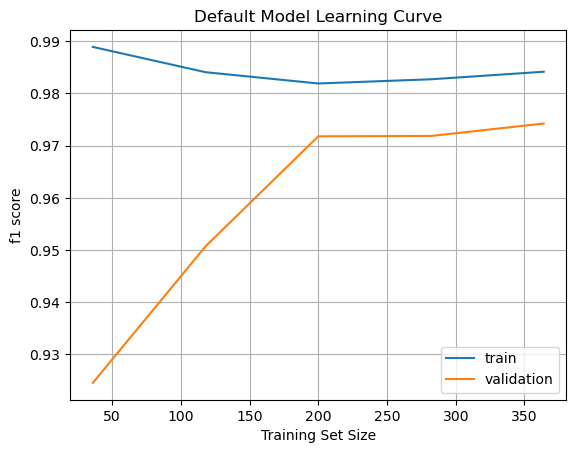

In [9]:
rbf_train_mean = rbf_train_scores.mean(axis=1)
rbf_validation_mean = rbf_validation_scores.mean(axis=1)

plt.plot(rbf_train_sizes, rbf_train_mean, label="train")
plt.plot(rbf_train_sizes, rbf_validation_mean, label="validation")

plt.title("Default Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_default_learning_curve.png')
plt.show()

#### Intermediate Model

##### Kernel

In [10]:
svc = SVC(kernel='poly', random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [11]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
# train_sizes = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]
poly_train_sizes, poly_train_scores, poly_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

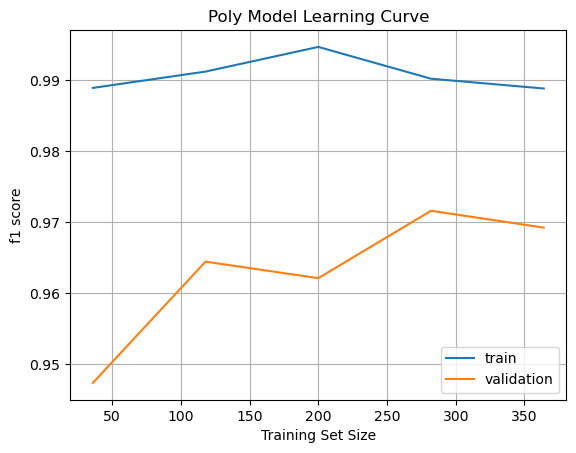

In [13]:
poly_train_mean = poly_train_scores.mean(axis=1)
poly_validation_mean = poly_validation_scores.mean(axis=1)

plt.plot(poly_train_sizes, poly_train_mean, label="train")
plt.plot(poly_train_sizes, poly_validation_mean, label="validation")

plt.title("Poly Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_poly_learning_curve.png')
plt.show()

In [14]:
svc = SVC(kernel='linear', random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [15]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        72
           M       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [16]:
# train_sizes = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]
linear_train_sizes, linear_train_scores, linear_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

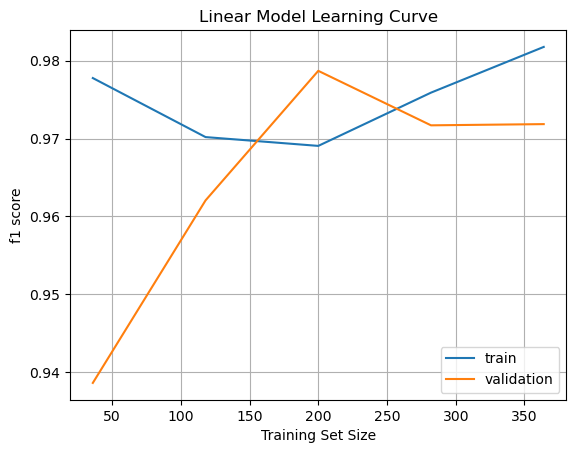

In [17]:
linear_train_mean = linear_train_scores.mean(axis=1)
linear_validation_mean = linear_validation_scores.mean(axis=1)

plt.plot(linear_train_sizes, linear_train_mean, label="train")
plt.plot(linear_train_sizes, linear_validation_mean, label="validation")

plt.title("Linear Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_linear_learning_curve.png')
plt.show()

In [18]:
svc = SVC(kernel='sigmoid', random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [19]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.17      0.11      0.14        72
           M       0.06      0.10      0.07        42

    accuracy                           0.11       114
   macro avg       0.12      0.10      0.10       114
weighted avg       0.13      0.11      0.11       114



In [20]:
sigmoid_train_sizes, sigmoid_train_scores, sigmoid_validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

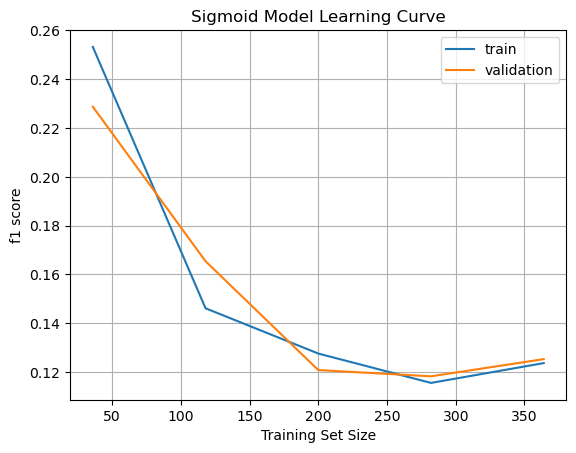

In [21]:
sigmoid_train_mean = sigmoid_train_scores.mean(axis=1)
sigmoid_validation_mean = sigmoid_validation_scores.mean(axis=1)


plt.plot(sigmoid_train_sizes, sigmoid_train_mean, label="train")
plt.plot(sigmoid_train_sizes, sigmoid_validation_mean, label="validation")

plt.title("Sigmoid Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_sigmoid_learning_curve.png')
plt.show()

### Kernel Learning Curve

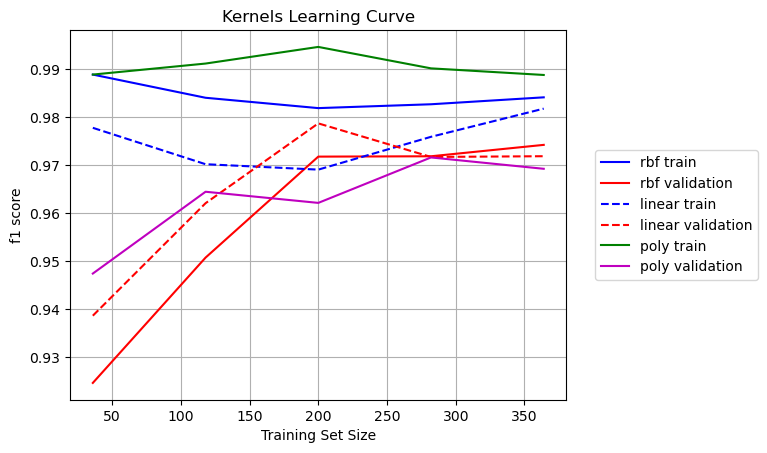

In [22]:
plt.plot(rbf_train_sizes, rbf_train_mean, 'b', label="rbf train")
plt.plot(rbf_train_sizes, rbf_validation_mean, 'r', label="rbf validation")
plt.plot(linear_train_sizes, linear_train_mean, 'b--',label="linear train")
plt.plot(linear_train_sizes, linear_validation_mean, 'r--', label="linear validation")
plt.plot(poly_train_sizes, poly_train_mean, 'g', label="poly train")
plt.plot(poly_train_sizes, poly_validation_mean, 'm', label="poly validation")
# plt.plot(sigmoid_train_sizes, sigmoid_train_mean, 'g--', label="sigmoid train")
# plt.plot(sigmoid_train_sizes, sigmoid_validation_mean, 'm--', label="sigmoid validation")

plt.title("Kernels Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_kernels_learning_curve.png', bbox_inches='tight')
plt.show()

#### Final Model

In [23]:
svc = SVC(random_state=RANDOM_STATE, C=0.1, kernel='poly')
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

In [24]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

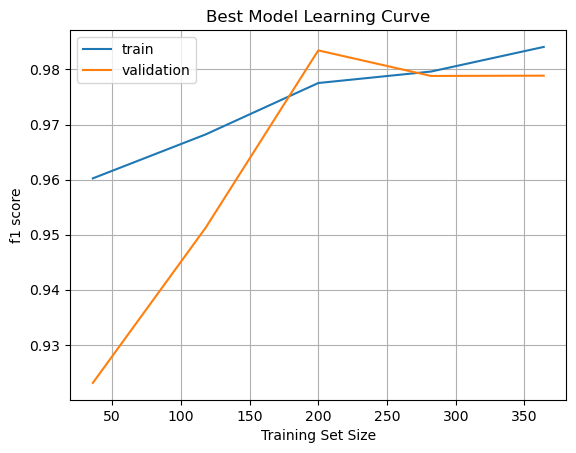

In [25]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Best Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_best_learning_curve.png')
plt.show()

#### Sub/Optimal Learning Curve

In [26]:
svc = SVC(random_state=RANDOM_STATE, C=0.1, kernel='poly')
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])
t0 = time.time()
pipeline.fit(X_train, y_train.values.ravel())
print("Training time:", time.time()-t0)
y_pred = pipeline.predict(X_test)
# {'model__C': 0.1, 'model__kernel': 'poly'}

Training time: 0.006246089935302734


In [27]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [28]:
svc = SVC(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])

train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

svc = SVC(random_state=RANDOM_STATE, C=0.1, kernel='poly')
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])

train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train.values.ravel(), cv = 5,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

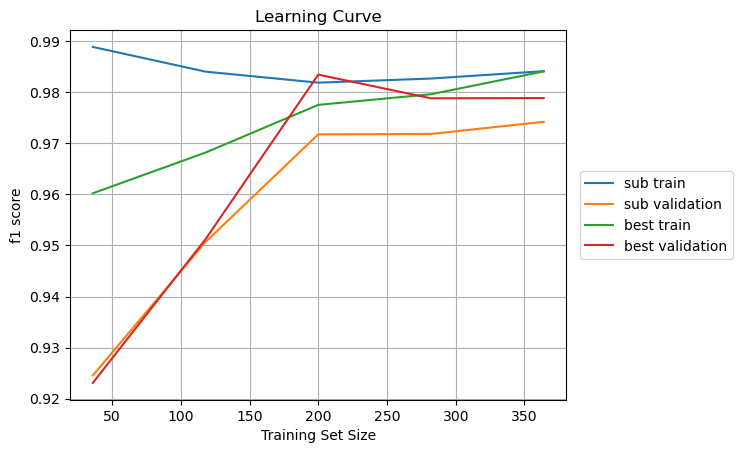

In [29]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)

plt.plot(train_sizes, train_mean, label="sub train")
plt.plot(train_sizes, validation_mean, label="sub validation")
plt.plot(train_sizes1, train_mean1, label="best train")
plt.plot(train_sizes1, validation_mean1, label="best validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
# plt.tight_layout()
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_combo_learning_curve.png', bbox_inches='tight')
plt.show()

### Validation Plot

In [30]:
from sklearn.model_selection import validation_curve
import numpy as np

In [31]:
svc = SVC(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])

#### C

In [32]:
parameter_range = [0.1, 1, 10, 15, 20, 50, 100]
train_score, test_score = validation_curve(pipeline, X_train, y_train.values.ravel(),
                                          param_name="model__C",
                                           param_range=parameter_range,
                                           cv=5, scoring="f1_macro")

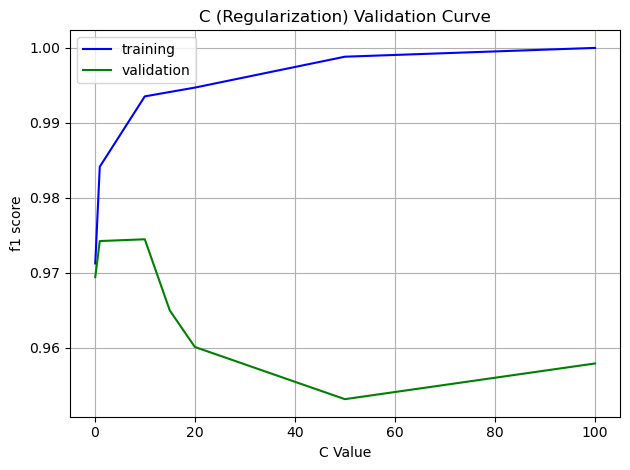

In [33]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)


# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="training", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("C (Regularization) Validation Curve")
plt.xlabel("C Value")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('breast_cancer_plots/svm_bc_c_validation_curve.png')
plt.show()

### Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
svc = SVC(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('sm', sm), ('model', svc)])

In [36]:
svc = SVC(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', svc)])
params = [{'model__C': [0.1, 1, 10, 100, 1000],  
              'model__kernel': ['rbf', 'poly', 'linear', 'sigmoid']}]
grid = GridSearchCV(pipeline,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=5)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'model__C': 0.1, 'model__kernel': 'poly'}
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

